In [1]:
import jax
import jax.numpy as jnp

In [2]:
x = jnp.arange(10)
print(x)

[0 1 2 3 4 5 6 7 8 9]


In [3]:
x

DeviceArray([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [4]:
long_vector = jnp.arange(int(1e7))
%timeit jnp.dot(long_vector,long_vector).block_until_ready()

196 µs ± 2.27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [5]:
def sum_of_squares(x):
    return jnp.sum(x**2)

In [6]:
sum_of_square_dx = jax.grad(sum_of_squares)

x = jnp.asarray([1.0,2.0,3.0,5.0])

print(sum_of_squares(x))

39.0


In [7]:
print(sum_of_square_dx(x))

[ 2.  4.  6. 10.]


In [8]:
def sum_squared_error(x,y):
    return jnp.sum((x -y) ** 2)

In [9]:
sum_squared_error_dx = jax.grad(sum_squared_error)

In [10]:
y = jnp.asarray([1.1,2.1,3.1,5.1])
print(sum_squared_error_dx(x,y))

[-0.20000005 -0.19999981 -0.19999981 -0.19999981]


In [11]:
jax.value_and_grad(sum_squared_error)(x,y)

(DeviceArray(0.03999995, dtype=float32),
 DeviceArray([-0.20000005, -0.19999981, -0.19999981, -0.19999981], dtype=float32))

In [12]:
def squared_error_with_aux(x,y):
    return sum_squared_error(x,y),x-y


In [13]:
jax.grad(squared_error_with_aux)(x,y)

TypeError: Gradient only defined for scalar-output functions. Output was (DeviceArray(0.03999995, dtype=float32), DeviceArray([-0.10000002, -0.0999999 , -0.0999999 , -0.0999999 ], dtype=float32)).

In [14]:
jax.grad(squared_error_with_aux,has_aux=True)(x,y)

(DeviceArray([-0.20000005, -0.19999981, -0.19999981, -0.19999981], dtype=float32),
 DeviceArray([-0.10000002, -0.0999999 , -0.0999999 , -0.0999999 ], dtype=float32))

In [15]:
import numpy as np
x = np.array([1,2,3])

In [16]:
def in_place_modify(x):
    x[0] = 123
    return None

In [17]:
in_place_modify(x)

In [18]:
x

array([123,   2,   3])

In [19]:
in_place_modify(jnp.array(x))

TypeError: '<class 'jaxlib.xla_extension.DeviceArray'>' object does not support item assignment. JAX arrays are immutable; perhaps you want jax.ops.index_update or jax.ops.index_add instead?

In [ ]:

def jax_in_place_modify(x):
    return jax.ops.index_update(x, 0, 123)
y = jnp.array([1,2,3])

jax_in_place_modify(y)

In [ ]:
y

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=0.1, size=(100,))
ys = xs * 3 - 1 + noise

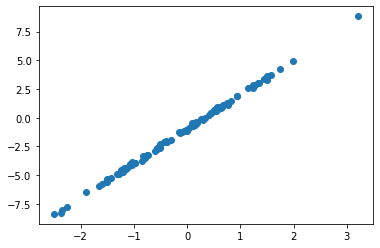

In [22]:
plt.scatter(xs,ys)

In [23]:
def model(theta, x):
    w, b = theta
    return w * x + b

In [24]:
def loss_fn(theta, x, y):
    prediction = model(theta, x)
    return jnp.mean((prediction - y)**2)

In [25]:
def update(theta, x, y, lr=0.1):
    return theta - lr * jax.grad(loss_fn)(theta, x, y)

In [26]:
theta = jnp.array([1.,1.])
for _ in range(1000):
    theta = update(theta, xs, ys)

w: 3.00, b: -0.98


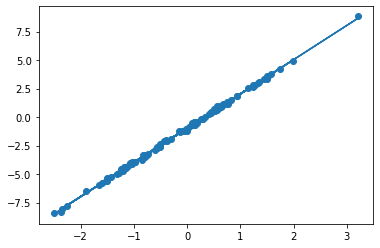

In [27]:
plt.scatter(xs,ys)
plt.plot(xs, model(theta, xs))
w,b = theta
print(f"w: {w:<.2f}, b: {b:<.2f}")